In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
streeteasy = pd.read_csv(r"C:\Users\JONATHAN GEORGE\Downloads\manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()

ols.fit(x_train, y_train)

LinearRegression()

In [3]:
# Sonny doesn't have an elevator so the 11th item in the list is a 0

sonny_apartment = pd.DataFrame({
    'size_sqft': [620],
    'building_age_yrs': [98]
})

predict = ols.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2789.28


In [4]:
# Add predictions to the test DataFrame for plotting
sonny_apartment['rent_predicted'] = predict

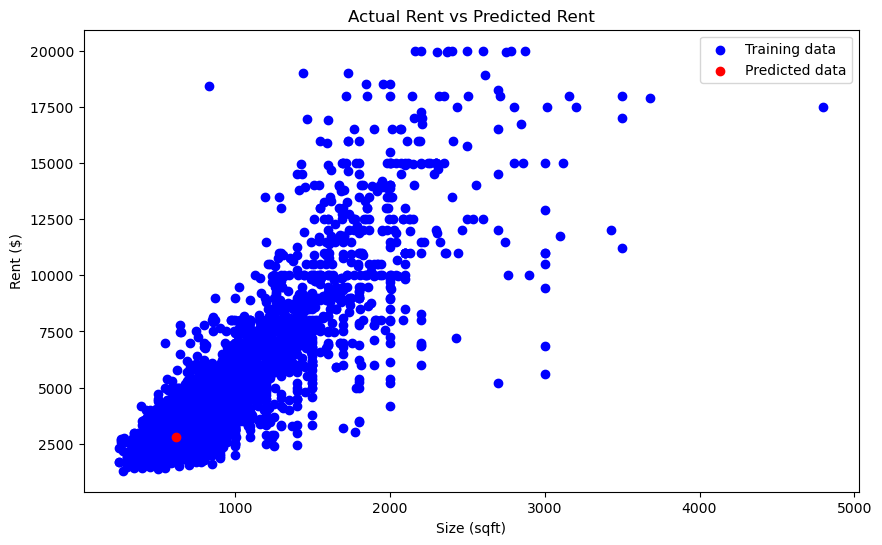

In [5]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(df['size_sqft'], df['rent'], color='blue', label='Training data')

# Plot predicted data
plt.scatter(sonny_apartment['size_sqft'], sonny_apartment['rent_predicted'], color='red', label='Predicted data')

# Adding labels and title
plt.xlabel('Size (sqft)')
plt.ylabel('Rent ($)')
plt.title('Actual Rent vs Predicted Rent')
plt.legend()

plt.show()

data_train with predictions and residuals:
       rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0          1545   2550       0.0          1        480              9    2.0   
1          2472  11500       2.0          2       2000              4    1.0   
2          2919   4500       1.0          1        916              2   51.0   
3          2790   4795       1.0          1        975              3    8.0   
4          3946  17500       2.0          2       4800              3    4.0   
...         ...    ...       ...        ...        ...            ...    ...   
3534       7582   4210       1.0          1        532              3    8.0   
3535       5686   6675       2.0          2        988              5   10.0   
3536       9679   1699       0.0          1        250              2    5.0   
3537       5188   3475       1.0          1        651              6    5.0   
3538       4718   4500       1.0          1        816              4   11.0

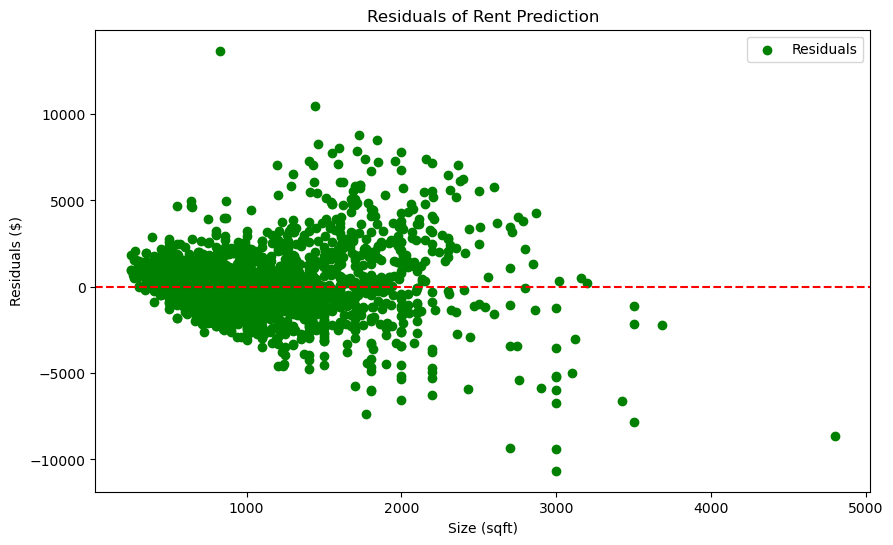

In [6]:
# Separate features (X) and target (y)
X_train = df[['size_sqft', 'building_age_yrs']]
y_train = df['rent']

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict on the training data to calculate residuals
y_pred_train = model.predict(X_train)

# Add predictions to the training DataFrame
df['rent_predicted'] = y_pred_train

# Calculate residuals
df['residuals'] = df['rent'] - df['rent_predicted']

# Debugging step: Check the contents of data_train
print("data_train with predictions and residuals:\n", df)

# Plotting the residuals
plt.figure(figsize=(10, 6))

# Plot residuals
plt.scatter(df['size_sqft'], df['residuals'], color='green', label='Residuals')

# Adding labels and title
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Size (sqft)')
plt.ylabel('Residuals ($)')
plt.title('Residuals of Rent Prediction')
plt.legend()

plt.show()

In [7]:
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  5.69105538 -11.3528805 ]
Intercept: 381.19217704010225


In [8]:
# Calculate and print the R² value
r2 = model.score(X_train, y_train)
print("R² value:", r2)

R² value: 0.7560615494335179
